<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Copy_of_Pawpularity_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uq fastai==2.2.7
from google.colab import drive 
drive.mount('/content/drive/')

     |████████████████████████████████| 193 kB 12.8 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 12.8 MB 25 kB/s 
     |████████████████████████████████| 776.8 MB 18 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.1 which is incompatible.
Mounted at /content/drive/


In [ ]:
import fastai 
fastai.__version__

'2.2.7'

In [ ]:
# Specifying the data paths 
train_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/'
test_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/'

train_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train.csv'
test_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test.csv'
sample_sub_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/sample_submission.csv'




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import fastai 
from fastai.vision.all import * 
from fastai import * 

# Loading in the data paths 
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)
sample_sub_df = pd.read_csv(sample_sub_path)

train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [ ]:
# Is there any null values 
train_df.isna().sum() 

Id               0
Subject Focus    0
Eyes             0
Face             0
Near             0
Action           0
Accessory        0
Group            0
Collage          0
Human            0
Occlusion        0
Info             0
Blur             0
Pawpularity      0
dtype: int64

In [ ]:
# How many samples 
train_df.shape[0]

9912

In [ ]:
# Append the full path 
def append_ext(fn , train = True):
  if train:
    return f'{train_image_path}{fn}.jpg'
  else:
    return f'{test_image_path}{fn}.jpg'

# Applying the above function on our dataframe 
train_df['full_path'] = train_df['Id'].apply(lambda x: append_ext(x))
test_df['full_path'] = test_df['Id'].apply(lambda x: append_ext(x , train = False))

train_df.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,full_path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0018df346ac9c1d8413cfcc888ca8246.jpg
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dc955e10590d3ca4673f034feeef2.jpg
5,001dd4f6fafb890610b1635f967ea081,0,0,1,0,0,0,0,0,0,0,0,1,74,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dd4f6fafb890610b1635f967ea081.jpg
6,0023b8a3abc93c712edd6120867deb53,0,1,1,1,0,0,0,0,1,1,0,0,22,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0023b8a3abc93c712edd6120867deb53.jpg
7,0031d6a9ef7340f898c3e05f92c7bb04,0,1,1,0,0,0,1,1,0,0,1,0,35,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0031d6a9ef7340f898c3e05f92c7bb04.jpg
8,0042bc5bada6d1cf8951f8f9f0d399fa,0,1,1,1,0,0,0,0,0,0,0,0,53,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0042bc5bada6d1cf8951f8f9f0d399fa.jpg
9,0049cb81313c94fa007286e9039af910,0,1,1,1,0,0,0,0,0,0,0,0,21,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0049cb81313c94fa007286e9039af910.jpg


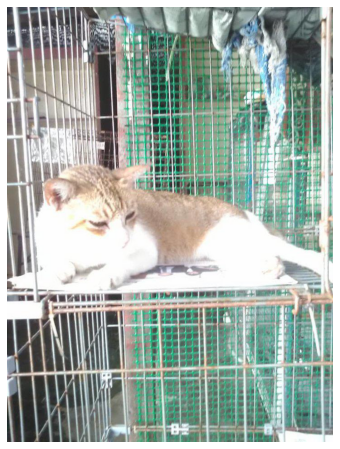

In [ ]:
import matplotlib.image as mpimg 
import random 
from matplotlib.pyplot import figure 

random_filename = random.choice(train_df['full_path'].tolist())

# Plotting the image 
im = mpimg.imread(random_filename)
figure(figsize = (10 , 8))
plt.imshow(im)
plt.axis('off');


In [ ]:
# Applying the transforms 

item_tfms=RandomResizedCrop(460)
batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
train_data = Path(train_image_path)

In [ ]:

# Creating the datablock 

paw_block = DataBlock(blocks = (ImageBlock , RegressionBlock()) , 
                      get_x = ColReader('full_path') , 
                      get_y = ColReader('Pawpularity') , 
                      splitter = RandomSplitter() , 
                      item_tfms = item_tfms , 
                      batch_tfms = batch_tfms)

# Getting the summary 
paw_block.summary(train_df)

Setting-up type transforms pipelines
0     0007de18844b0dbbb5e1f607da0606e0  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg
1     0009c66b9439883ba2750fb825e1d7db  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg
2     0013fd999caf9a3efe1352ca1b0d937e  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0013fd999caf9a3efe1352ca1b0d937e.jpg
3     0018df346ac9c1d8413cfcc888ca8246  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/0018df346ac9c1d8413cfcc888ca8246.jpg
4     001dc955e10590d3ca4673f034feeef2  ...  /content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/001dc955e10590d3ca4673f034feeef2.jpg
...                                ...  ...                                                                                                               ...
9907  ffbfa0383

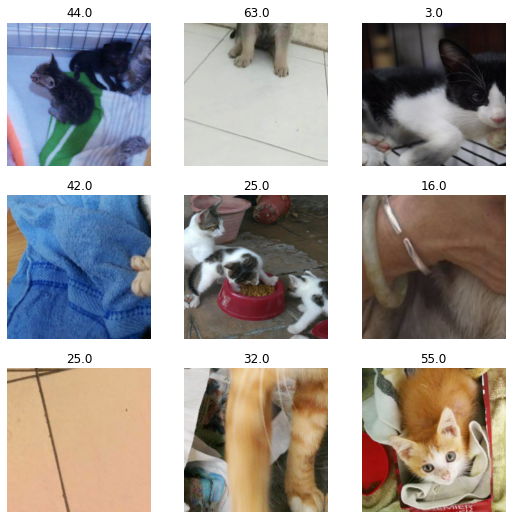

In [ ]:
# Creating the DataLoaders 
paw_dls = paw_block.dataloaders(train_df , batch_size= 32)

# Viewing the batch of image 
paw_dls.show_batch()

In [ ]:
# Min and max 
min(train_df['Pawpularity']) , max(train_df['Pawpularity'])

(1, 100)

In [ ]:

# Building a learner 
learn = cnn_learner(paw_dls , resnet50 , loss_func= MSELossFlat() ,
                    metrics = rmse  , y_range = (0 , 100) )



SuggestedLRs(lr_min=0.0001737800776027143, lr_steep=4.786300905834651e-06)

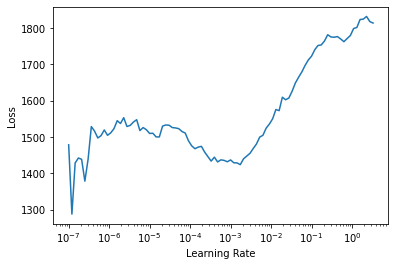

In [ ]:
# Finding the learning rate 
learn.lr_find(suggestions= True)

In [ ]:
# Fitting for 3 epochs 
learn.fit_one_cycle(3 , 1e-3)

epoch,train_loss,valid_loss,_rmse,time
0,1097.557861,832.110535,28.846327,03:54
1,573.025818,433.255493,20.814789,03:54
2,466.712708,389.518066,19.736212,03:55


In [ ]:
from fastai.test_utils import *


In [ ]:
# Unfreezing all the networks 
learn.unfreeze()

SuggestedLRs(lr_min=2.7542287170945203e-07, lr_steep=4.365158383734524e-05)

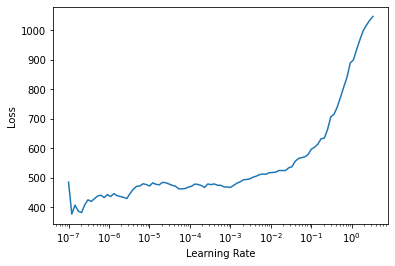

In [ ]:
 # Finding the learning rate 
learn.lr_find(suggestions= True)

In [ ]:
# Fine tuning the model 
learn.fit_one_cycle(20 , lr_max= slice(1e-4 , 1e-3))

epoch,train_loss,valid_loss,_rmse,time


In [ ]:
test_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,full_path
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1,/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg


In [ ]:
test_file_lists = [Path(pth) for pth in test_df['full_path'].tolist()]
test_file_lists

[Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4128bae22183829d2b5fea10effdb0c3.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/43a2262d7738e3d420d453815151079e.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/4e429cead1848a298432a0acad014c9d.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/80bc3ccafcc51b66303c2c263aa38486.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/8f49844c382931444e68dffbe20228f4.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/b03f7041962238a7c9d6537e22f9b017.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/c978013571258ed6d4637f6e8cc9d6a3.jpg'),
 Path('/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/e0de453c1bffc20c22b072b34b54e50f.jpg')]

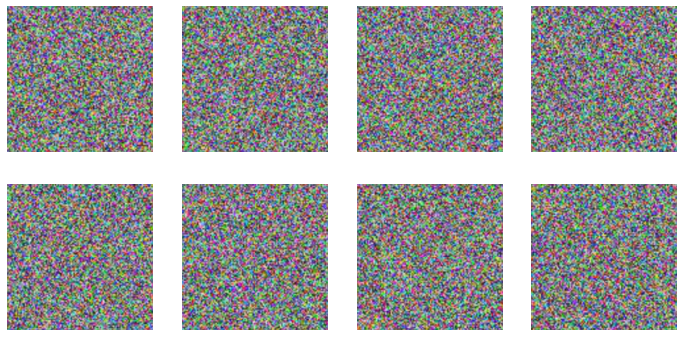

In [ ]:
# Test Dataloader 
test_dls = paw_dls.test_dl(test_file_lists)

test_dls.show_batch()

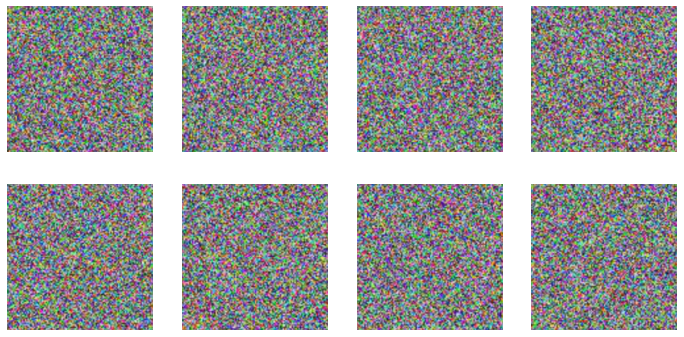

In [ ]:
test_fns = get_image_files(test_image_path)

# Test Dataloader 
test_dls = paw_dls.test_dl(test_fns)

test_dls.show_batch()

In [ ]:
# Saving the model 
learn.export(fname = 'baseline.pkl')

In [ ]:
# Getting predictions 
test_pred = learn.get_preds(test_dls)
test_pred[0]

TypeError: ignored

In [ ]:
get_image

In [ ]:
import os 
test_data = pd.DataFrame()

# Get the predictions 
test_dl = paw_dls.test_dl(get_image_files(test_image_path))
test_pred = learn.get_preds(dl = test_dl)

test_data['Id'] = [img[:-4]for img in os.listdir(test_image_path)]
test_data

,Id
0,e0de453c1bffc20c22b072b34b54e50f
1,8f49844c382931444e68dffbe20228f4
2,b03f7041962238a7c9d6537e22f9b017
3,4128bae22183829d2b5fea10effdb0c3
4,4e429cead1848a298432a0acad014c9d
5,c978013571258ed6d4637f6e8cc9d6a3
6,80bc3ccafcc51b66303c2c263aa38486
7,43a2262d7738e3d420d453815151079e


In [ ]:
test_data['Pawpularity'] = test_pred[0].detach().numpy()
test_data

,Id,Pawpularity
0,e0de453c1bffc20c22b072b34b54e50f,33.790829
1,8f49844c382931444e68dffbe20228f4,30.763685
2,b03f7041962238a7c9d6537e22f9b017,31.726717
3,4128bae22183829d2b5fea10effdb0c3,32.450771
4,4e429cead1848a298432a0acad014c9d,31.551474
5,c978013571258ed6d4637f6e8cc9d6a3,32.104061
6,80bc3ccafcc51b66303c2c263aa38486,34.265408
7,43a2262d7738e3d420d453815151079e,31.908543


In [ ]:
sample_sub_df

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,67.75
1,43a2262d7738e3d420d453815151079e,59.15
2,4e429cead1848a298432a0acad014c9d,20.02
3,80bc3ccafcc51b66303c2c263aa38486,94.53
4,8f49844c382931444e68dffbe20228f4,89.82
5,b03f7041962238a7c9d6537e22f9b017,65.50
6,c978013571258ed6d4637f6e8cc9d6a3,71.42
7,e0de453c1bffc20c22b072b34b54e50f,5.85
